# LABORATORIO DE COSMOLOGÍA - Determinación de los parámetros cosmológicos a partir del análisis de datos de supernovas de tipo Ia

Profesor: Mindaugas Karciauskas


Nombre:Pablo Del Olmo Mier

In [3]:
#Lo primero que hacemos antes de realizar la practica es importar los modulos necesarios
from numpy import *
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from sympy import symbols, diff

In [ ]:
"""" 
                                             #PREGUNTA 1#
Construir una funcion en Python que tenga como variables de entrada: el valor de  ΩM,
el valor de ω y un vector con distintos valores del redshift. Y como variable de salida un vector
con los valores de dL(z, ΩM, ω) para cada valor del redshift del vector de entrada (en unidades
de H−1

""" 

In [4]:
def integrand(y,omega_m,w):
    return (1/(sqrt(omega_m*(1+y)**3+(1-omega_m)*((1+y)**(3*(1+w))))))   #DEFINIMOS EL INTEGRANDO

def Calculo_dl(zt,omega_m,w):                                           #FUNCION PARA OBTENER DL
    return (1+zt)*(quad(lambda y: integrand(y,omega_m,w), 0, zt,epsabs = 1e-2)[0])
#Notese la tolerancia que hemos elegido es 1e-2,tal y como fue explicado en los videotutoriales.
#Luego la función pedida en el enunciado será:
Calculo_dl_vectorize=np.vectorize(Calculo_dl,excluded=("tao_m","w"))   #PARA QUE PODAMOS INTRODUCIR ARRAYS de redshifts(z) EN LA FUNCION



In [ ]:
"""" 
                                             #PREGUNTA 2#
Haciendo uso de la funcion anterior y de la funcion plot, dibujar dL (z, 0.3, -1) para z ∈ (0,
1.5). ¿Cual es el valor de  dL (0.5, 0.3, -1)?


""" 

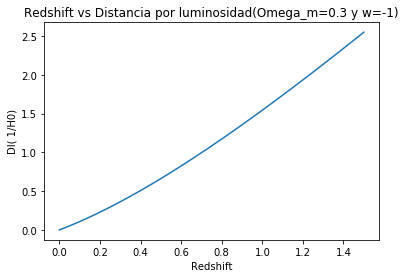

In [6]:
#Creamos un array de z que contenga valores desde el 0 al 1.5, El vector contendra 200 elementos
z1=linspace(0,1.5,500)
dl1=Calculo_dl_vectorize(z1,0.3,-1)   #obtenemos el array de dl
import matplotlib.pyplot as plt
plt.plot(z1,dl1)                                    #hacemos plot de dl frente a z
plt.xlabel('Redshift')
plt.ylabel('Dl( 1/H0)')
plt.title('Redshift vs Distancia por luminosidad(Omega_m=0.3 y w=-1)')
plt.grid(False)

plt.show()

Observaciones:
Podemos apreciar una relacion aproximadamente lineal entre el redshift y la distancia por luminosidad.Luego a mayor corrimiento al rojo
de las longitudes de onda de una supernova a mayor distancia que se encuentra de nosotros.Esto esta en concordancia con que recibamos un menor flujo de energía de ellas

In [7]:
#El valor de dL (0.5, 0.3, -1) es: (Unidades 1/H0)
print("El valor de dl es" ,Calculo_dl_vectorize(0.5,0.3,-1))

El valor de dl es 0.661476502430917


In [ ]:
""""
               #PREGUNTA 3#
Como hemos visto en el guion, hay veces que no nos interesa algun parametro del probl
lema y es conveniente marginalizarlo. En el caso de las supernovas, vamos a marginalizar el
parametro M . Calcular el valor Mm(ΩM, ω) que minimiza χ^2
(ΩM, ω, M ), definiendo así la
funcion χ^2  marginalizada 
""""""


In [8]:
def uth(omega_m,w,M):
    return 5*np.log10(Calculo_dl_vectorize(z,omega_m,w)) +M      #definicion del modulo de distancia en unidades naturales,lo definimos de tal manera que acepte arrays de z como argumento


In [9]:
#Definiciones:
#z-->vector redshift
#m-->valores uobservado
#dm-->Inceritudmbres Uobservado


def xicuadrado(omega_m,w,M):
    #Otra manera alternativa será emplear un bucle for
    #for i in range(0,len(m)):
            #f=f+  ((m[i]-uth(tao_m,w,M)[i])**2)/(dm[i]**2)
    return(np.sum(((m-uth(omega_m,w,M))**2)/dm**2))
            
#Hay que encontar el valor de M que minimiza la funcion xicuadrado
#Para ellos vasta con realizar la derivada parcial de la funcion xicuadrado
#con respecto a M e igualarla a cero.Una vex hecho esto tan solo
#debemos despejar M y dejarlo en función de Los parametros tao_m y W.
#(Calculo de la derivada hecho a mano)

def M_minimo(omega_m,w):
    return (1/(np.sum(dm**-2))*np.sum((m-5*np.log10(Calculo_dl_vectorize(z,omega_m,w))) /(dm**2)))

#Simplement introducimos esta función en el xicuadrado marginalizado,la
#cual solo dependerá de tao_m y w

def xicuadradomarginalizada(omega_m,w):
    return xicuadrado(omega_m,w,M_minimo(omega_m,w))
    

Observaciones:
Hemos derivado la expresión de $\chi^2$ que aparecía en el guión  con respecto a cero y hemos despejo la M_min   obteniendo asi la siguiente expresion teorica para M_min:
     $$ M_{min}(Ω,ω) = \frac{1}{\sum_{j=1}^n \sigma_{\mu j}^{-2}}\sum_{j=1}^n \frac{\mu_{j}^{obs}-5\log{dl_j(z,Ω,ω)}}{\sigma_{\mu j}^2}$$
     
Posteriormente,  solamente hace falta sustuituir ese  valor de M_min en $χ^2$ para así obtener la expresión de $\chi^2$ marginalizada respecto de M_min

In [ ]:
""""
                             #PREGUNTA 4#
Construir una funcion en Python que, usando la funcion dL(z, ΩM, ω), 
calcule χ2 marginalizada para los datos de supernovas P antheon.txt.
Al cargar estos datos, se definen en el workspace
las variables z, m, dm; siendo z el vector de redshift de las supernovas (ordenado de menor a
mayor), m los valores de µobs y dm los valores de σµ de cada redshift.
¿Cual es el valor de  χ2 marginalizado(0.3, -1)?

""""""

In [10]:
#Primero cargamos los datos
z,m,dm = np.loadtxt("Pantheon.txt", skiprows=1, usecols=(1,4,5), unpack=True)
#Después empleamos la función del apartado anterior
#El valor de M (0.3, -1) que minimiza xicuadrado es:
print("El valor de M que minimiza es" ,M_minimo(0.3,-1))



El valor de M que minimiza es 23.810068889286466


In [11]:
#Poseriormente obtenemos el valor de Xicuadrado margianizado
print("El valor de χ2 marginalizado es" ,xicuadradomarginalizada(0.3,-1))


El valor de χ2 marginalizado es 1037.1784427811267


In [ ]:

""""
Ahora que tenemos definidas las funciones necesarias, vamos a analizar distintos modelos. El
primer modelo que analizaremos es el modelo de ΛCDM, en el cual solo tenemos ´ ΩM como
unico parametro libre.  

                            #PREGUNTA 5#
Calcular el valor de ΩM que mejor ajusta a los datos de supernovas, 
para ese valor ¿cual es el valor de χ2?

""""""

In [198]:
#Ahora dejaremos fijo el parámetro w=-1


In [12]:
def findminimum(omega_m_prueba,w):
    xicuadradovalues=np.zeros(len(omega_m_prueba))
    for i in range(0,len(omega_m_prueba)):
            xicuadradovalues[i]=xicuadradomarginalizada(omega_m_prueba[i],w)
    xicuadrado_best_omega=np.min(xicuadradovalues)
    whereismymin=[i for i, x in enumerate(xicuadradovalues) if x == xicuadrado_best_omega]
    best_omega=omega_m_prueba[whereismymin]
    return xicuadrado_best_omega,np.asscalar(best_omega),xicuadradovalues

In [13]:
#creamos un vector de prueba de omega_m en torno a 0.3
omega_m_prueba=linspace(0.26,0.32,300)

In [14]:
xicuadrado_best_omega,best_omega,xicuadradovalues=findminimum(omega_m_prueba,-1)

In [15]:
#Una vez encontrados el mejor valor de omega y el valor de xi cuadrado solo falta
#hacer un print

print("El valor de omega_m del mejor ajuste es" ,best_omega)
print("El valor de Xicuadrado para ese omega es" ,xicuadrado_best_omega)

El valor de omega_m del mejor ajuste es 0.28448160535117056
El valor de Xicuadrado para ese omega es 1035.6791752873514


In [ ]:

""""
                            #PREGUNTA 6#
Calcular los errores de 1 σ, tanto por la derecha como por la izquierda, del parametro ´ ΩM
anterior.

""""""

In [16]:
#Utilizando la fórmula del guión,en el caso de 1σ debemos alejarnos (1)^2= 1 unidad.
#Chammaeremo delomega_m_derecha al error por la derecha
#llamaremos deltaomega_m_izquierda al error por la izquierda.

#sabemos que estos errores no tienen por que ser iguales si la distribución no es gaussiana
#Tenemos dos opciones : grafíca y numérica.
#Elegiremos la opción numérica pues es un método mas agil:

def finderrores(xicuadradovalues,xicuadrado_best_omega,omega_m_prueba):
    function=xicuadradovalues-(xicuadrado_best_omega+1)  #Mas uno porque hemos dicho que era una unidad
    absfunction=abs(function)        #Le damos "la vuelta" a la funcion
    mymin1,mymin2=np.partition(absfunction, 1)[0:2]   #corresponde al minimo por la izuquierda y derecha
    whereismymin1=[i for i, x in enumerate(absfunction) if x == mymin1]
    whereismymin2=[i for i, x in enumerate(absfunction) if x == mymin2]
    omegaizquierda=omega_m_prueba[whereismymin2]  #devuelve valor de omega por la izqueirda
    omegaderecha=omega_m_prueba[whereismymin1]    #devuelve valor de omega por la derecha
    return np.asscalar(omegaizquierda),np.asscalar(omegaderecha)




In [17]:

finderrores(xicuadradovalues,xicuadrado_best_omega,omega_m_prueba)   #ejecutamos

(0.2722408026755853, 0.297123745819398)

In [18]:
#Calcular ahora el error por la izquierda es trivial,tan solo tenemos que restar
iz,der=finderrores(xicuadradovalues,xicuadrado_best_omega,omega_m_prueba) 
print('el error por la izquierda de omega_m es --'  ,best_omega-iz )
print('el error por la derecha de omega_m es --'  ,der-best_omega )
print('Luego tenemos que las incertidumbres del mejor omega vale' ,best_omega,'+' ,der-best_omega,' y ',best_omega,'-',best_omega-iz)

el error por la izquierda de omega_m es -- 0.01224080267558525
el error por la derecha de omega_m es -- 0.012642140468227425
Luego tenemos que las incertidumbres del mejor omega vale 0.28448160535117056 + 0.012642140468227425  y  0.28448160535117056 - 0.01224080267558525


Observaciones:
Para un modelo definido con un solo parámetro libre,los intervalos de confianza se definen como: $\Delta\chi^2(\sigma_k)=k^2$. Donde $\Delta\chi^2$ es la diferencia entre el valor de $\chi^2$ del mejor ajuste ($\chi^2_{min}$) y otro $\chi^2$.

In [ ]:

""""
                            #PREGUNTA 7#
                            
Calcular el valor de χ
2 para un universo de Einstein-de Sitter y comparar su valor con el
valor de χ
2 para el mejor ajuste. Representar el modulo de distancia en funci ´ on del redshift ´
para el caso del mejor ajuste y para el Universo de Einstein - de Sitter, junto con los datos de
las supernovas con sus errores. ¿Cuantas sigmas separan ambos ajustes? 
""""""

In [19]:
#para el universo de einstein de sitter 
omegaeinsitter=1
#y Xicuadrado vale:
Ein_Sitter=xicuadradomarginalizada(omegaeinsitter,-1)
print("Para el universo Ein_Sitter con omega_m=",omegaeinsitter, " Xicuadrado vale ", Ein_Sitter)
print("Para nuestro omega_m=",best_omega,"Xicuadrado vale ", xicuadrado_best_omega)

Para el universo Ein_Sitter con omega_m= 1  Xicuadrado vale  2482.6643239481136
Para nuestro omega_m= 0.28448160535117056 Xicuadrado vale  1035.6791752873514


Observaciones:
Para el universo de Einstein-de Sitter (Ω=1 ω=-1) el valor de $\chi^2_{mar}$ (2482.6) es mayor que el valor obtenido a partir del Ω que mejor ajusta los datos experimentales,calculado en el apartado anterior(1035.6).    

In [20]:
#Para reperesentar el módulo de la distancia llamamos a la funcion Uuth,definiada
#antes.Importante!!! Le metemos el valor de M de el tercer apartado

#Como queremos que la grafica se vea bien,creamos una funcion de modulo
#de distancia alternativa para que salgan los datos ordenados de el vector de redshift z

def uthordenado(omega_m,w,M,zshort):
    return 5*np.log10(Calculo_dl_vectorize(zshort,omega_m,w)) +M 

zordenado=np.sort(z)

uthEin_Sitter=uthordenado(omegaeinsitter,-1,M_minimo(omegaeinsitter,-1),zordenado)
uthmodel=uthordenado(best_omega,-1,M_minimo(best_omega,-1),zordenado)



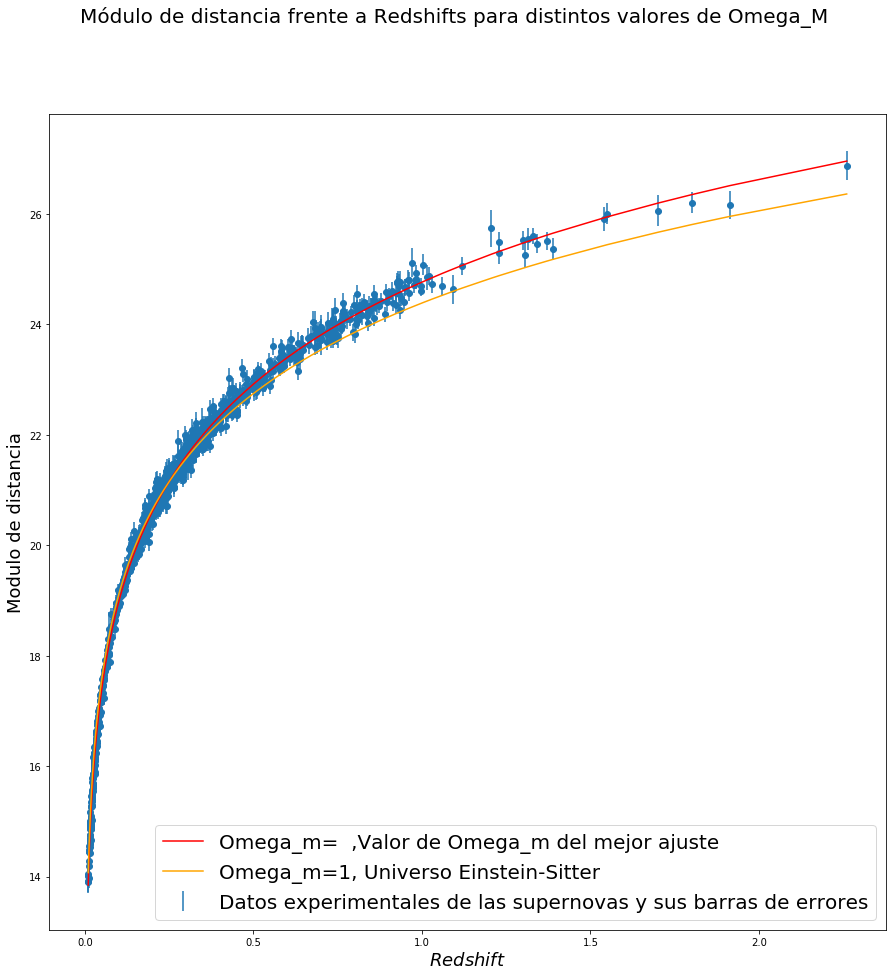

In [21]:
#Realizamos el plot
fig, ax = plt.subplots(1, figsize=(15,15))                                     #hacemos plot de dl frente a z
plt.scatter(z,m)
plt.errorbar(z,m,yerr=dm, linestyle="None",label='Datos experimentales de las supernovas y sus barras de errores')
ax.plot(zordenado,uthmodel,'red', label=r'Omega_m=  ,Valor de Omega_m del mejor ajuste')  
ax.plot(zordenado,uthEin_Sitter, 'orange', label=r'Omega_m=1, Universo Einstein-Sitter')  

ax.axes.xaxis.set_label_text("$Redshift$", fontdict={"size":18})
ax.axes.yaxis.set_label_text("Modulo de distancia", fontdict={"size":18})

fig.suptitle("Módulo de distancia frente a Redshifts para distintos valores de Omega_M", fontsize = 20) 
ax.legend(loc=4, fontsize = 20);     
plt.show()


Observaciones:
Ambos modelos ajustan bien los datos y son compatibles entre si.El ajuste a partir del valor de Ω que mejor ajusta los datos es más preciso. Las predicciones del módulo de las distancias para un universo de tipo Einstein-de Sitter son menores que las medidas experimentales.Esto significa que existe  un ritmo de expansión mayor del universo que el predicho en un Universo dominado por materia $\Omega=1$.

In [ ]:
#Como sabemos la relacción de que 1 sigma es igual al cuadrado d 1 delta de xicuadrado
#Para saber cuantas sigmas le sepran tendremos simplemente que restar los xicuadrado de ambos y hacer la raiz cuadrada


In [22]:
print('el numero de sigmas que separan los dos ajustes es ',sqrt(Ein_Sitter -xicuadrado_best_omega))

el numero de sigmas que separan los dos ajustes es  38.03925799303612


In [ ]:

""""
                                  #PREGUNTA 8#
Determinar la distancia por luminosidad y la distancia comovil en Mpc a una supernova
con z = 1 para el mejor ajuste obtenido de ΩM en ΛCDM (H−10 = 4285 Mpc). 
""""""

In [23]:
#Simplemente sustituimos el valor de best_omega y usamos z=1,ahora si debemos muliplicar por 4285 para 
#obtener la distancia en Mpc
#Para la distancia comovil hay que tener en cuenta la relacion entre la distancia por luminisidad y la coordenada comovil
#Segun como esta definido en los apuntes,simplemente habra que multiple por (1+z)=2
print("El valor de dl por luminosidad es" ,Calculo_dl_vectorize(1,best_omega,-1)*4285,"Mpc")
print("El valor de la distancia por coordenada comovil es" ,Calculo_dl_vectorize(1,best_omega,-1)*4285*0.5,'Mpc')


El valor de dl por luminosidad es 6673.135081629793 Mpc
El valor de la distancia por coordenada comovil es 3336.5675408148963 Mpc


Observaciones:
La distancia por luminosidad es el doble que la distancia comóvil para un redshift de z=1. La mitad de la distancia aproximadamente que medimos a partir del flujo de energía recibido se debe a la expansión del espacio.
Puesto que no estaba incluida en el guión,la formula para la distancia comovil en Mpc se ha obtenido con la siguiente expresión(siguiendo los apuntes)
$$ dcomov=\frac{dl}{1+z}$$

In [ ]:

""""
                                  #PREGUNTA 9#
Para finalizar, vamos a considerar el modelo ωCDM. En el tenemos dos parámetros libres ´
ΩM y ω. Calcular los valores de (ΩM, ω) que mejor ajustan a los datos de supernovas y representar en un grafico de ´ (ΩM, ω), los contornos de 1, 2 y 3 σ. Obtener los errores superiores e
inferiores para ΩM y ω a partir de la region de 1σ.
""""""

In [ ]:
#Esperamos cque los errres aumenten.Antes teniamos un parámetros fijo.
#Ahora,al aumentar un grado de libertad los errores en los parametros aumentaran.

In [42]:
#Ahora vamos a tener que trabajar con matrices y con dos bucles for anidados
#primero variaremos un parámetros  luego probaremos con todos los valores del otro

def findminimums(omega_m_prueba,w_prueba):   #omega_m_prueba y w_prueba deben ser arrays con 
    xicuadradovalues=np.zeros((len(omega_m_prueba),len(w_prueba)))  #creamos matriz nxm de ceros
    for i in range(np.size(omega_m_prueba)):
        for k in range(np.size(w_prueba)):
            xicuadradovalues[k,i]=xicuadradomarginalizada(omega_m_prueba[i],w_prueba[k])
            
    xicuadradobestvalue=np.min(xicuadradovalues)        
    P=(np.argmin(xicuadradovalues))    
    Fila=P//50
    indice=P-(Fila*50)
    best_omega=omega_m_prueba[indice]
    best_w=w_prueba[Fila]
    return xicuadradovalues,xicuadradobestvalue,np.asscalar(best_omega),np.asscalar(best_w)

In [43]:
#Vamos a usar 50 puntos
omega_m_prueba=linspace(0.15,0.45,50)
w_prueba=linspace(-1.9,-0.7,50)

In [44]:
xicuadradovalues2model,xicuadrado_bestvalue_2model,bestomega_2model,bestw2model=findminimums(omega_m_prueba,w_prueba)

In [45]:
print("El valor de omega_m del mejor ajuste eses" ,bestomega_2model)
print("El valor de w del mejor ajuste es" ,bestw2model)
print("El valor de Xicuadrado para ese omega y w es" ,xicuadrado_bestvalue_2model)

El valor de omega_m del mejor ajuste eses 0.3520408163265306
El valor de w del mejor ajuste es -1.2387755102040816
El valor de Xicuadrado para ese omega y w es 1032.4691910367455


In [426]:
#Dibujamos un countor plot de w y omega_M 
#w estará en el eje y y omega_m en el eje x

<IPython.core.display.Javascript object>


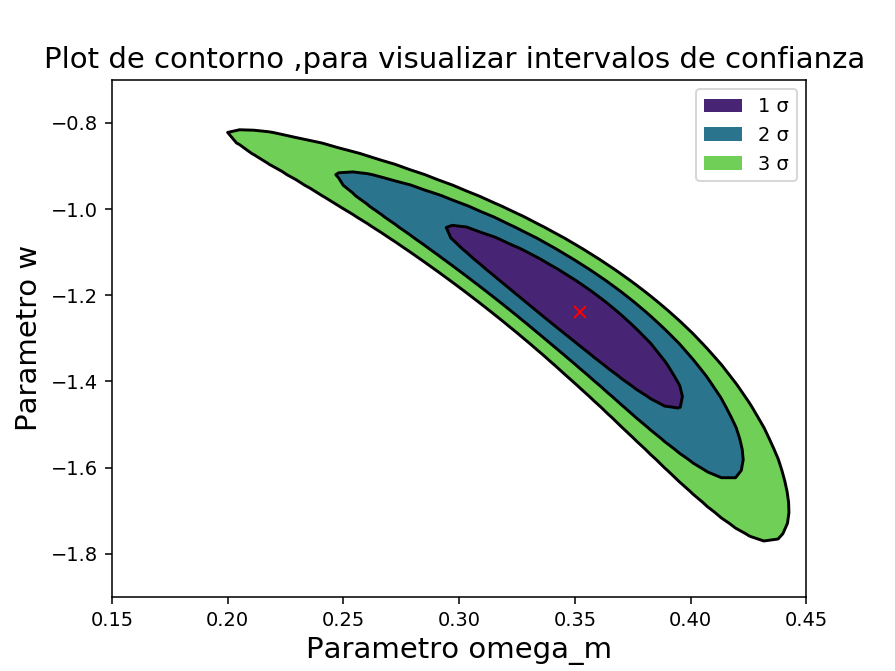

In [48]:
%matplotlib notebook
xx,yy=np.meshgrid(omega_m_prueba,w_prueba)
Z=xicuadradovalues2model   #likelihood
levels = [xicuadrado_bestvalue_2model,xicuadrado_bestvalue_2model+2.3,xicuadrado_bestvalue_2model+6.38,xicuadrado_bestvalue_2model+11.33]
plt.contour(xx,yy,Z,levels,colors='k')
cruz=plt.errorbar(bestomega_2model,bestw2model,fmt='x',color='r',label="Mejor ajuste: χ2 = 1032.5")

plt.contourf(xx,yy,Z,levels)
plt.xlabel("Parametro omega_m", fontsize=15)
plt.ylabel("Parametro w", fontsize=15)
plt.title("Plot de contorno ,para visualizar intervalos de confianza ", fontsize=15)
first_legend = plt.legend(handles=[cruz], loc='lower right')
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in (plt.contourf(xx,yy,Z,levels)).collections]
plt.legend(proxy, ["1 σ", "2 σ", "3 σ"])
plt.show()


In [53]:
#Para obtener los errores,tenemos en cuenta que de la elpise que tenemos
#buscamos el punto maximo en la proyeccion de los ejes,asi obtenemos los errores
#por la izquierda y por la derecha
#Para ello ahora,en vez del caso anterior,usaremos una tecnica grafica.
#Nos situaremos con el cursor en dichos puntos.
izqomega=0.29
deromega=0.38
izqw=1.45
derw=1.01

#Estos son los valroes extremos de los dos parametros tanto por la ziquieda como por la dereecha

In [57]:
#Podemos ver que para 1-sigma
print('el error inferior en 1 σ para Ω es --'  ,bestomega_2model-izqomega )
print('el error superior en 1 σ para Ω --'  ,deromega-bestomega_2model )

print('el error pinferior en 1 σ para ω es --'  ,bestw2model+izqw )
print('el error superior en 1 σ para ω es --'  ,-derw-bestw2model )

el error inferior en 1 σ para Ω es -- 0.062040816326530634
el error superior en 1 σ para Ω -- 0.02795918367346939
el error pinferior en 1 σ para ω es -- -0.2287755102040816
el error superior en 1 σ para ω es -- -0.21122448979591835


Observaciones:
 Observamos como los errores superior e inferior para Ω han aumentado, aproximadamente en un factor 5, respecto de los errores obtenidos cuando Ω era el único grado de libertad en el modelo de $\chi^2_{mar}$.
Como hemos indicado anteriormente es de esperar que los errrores aumenten.Antes teniamos un parámetros fijo.
Ahora,al aumentar un grado de libertad los errores en los parametros aumentaran.
La estimación de errores para el modelo $ωCDM$ se realiza estudiando el intervalo de confianza $1 σ$ ,es decir que se incluyen las medidas con un 68.27% de probabilidad. 
    
Un valor menor de $\chi^2_{mar}$ mínimo comporta un valor del Likelihood $L=e^{-\frac{\chi^2}{2}}$ mayor y por tanto una probabilidad mayor de observar los datos experimentales de acuerdo al modelo fijado con la elección de parámetros libres.

In [ ]:
#Discusion#


              .---  Conclusion de la practica--
              
1)Relación con el contenido teórico

La Cosmología de Supernovas trata de obtener información del modelo
cosmológico válido para nuestro Universo. Se basa en el conocido diagrama
de Hubble en el que se representan las distancias de supernovas Ia en
función de sus redshifts

En un universo en expansion existen en principio tres efectos a considerar sobre el
movimiento de una galaxia. Uno es la inercia de la expansi´on, que viene caracterizada
por el valor de la constante de Hubble H0. Otro es la tendencia al frenado de la expansion
originada por la atraccion gravitatoria mutua de toda la masa del universo. El ´ultimo
es un efecto repulsivo debido a la constante cosmologica.

Supongamos a un universo con tan poca densidad de materia que el efecto inercial de
expansion sea el dominante. La tasa de expansion permanecera muy aproximadamente
constante. Siempre que miremos a un objeto con redshift z = 1 estaremos mirando atras
hasta una epoca cuando los objetos del universo estaban la mitad de separados que en
la actualidad

Si observaramos la misma supernova pero ahora situada en un universo con mayor densidad de materia, la desaceleraci´on de la expansi´on por efecto de la atracci´on gravitatoria
implicar ıa que el universo se estaba expandiendo mas rapido en el pasado que en la actualidad. Los objetos en el universo estar´ıan la mitad de separados a redshift z = 1 que
lo que estan en la actualidad, pero el universo ya no tendr´ıa la mitad de su edad, sino
algo menos (un ejemplo de ello ser´ıa el modelo de Einstein-de Sitter)

2)Conclusiones de la práctica

El objetivo de este informe es determinar el valor de dos parámetros cosmológicos de acuerdo a las medidas experimentales del módulo de las distancias a supernovas de tipo 1a (Pantheon.txt) y los redshifts que presentan. Los parámetros que vamos a estudiar son la densidad de materia  $\Omega$ y la constante $\omega$ que deriva de la ecuación de estado de la materia oscura: 
                                                 
$$ p=ω\rho(a)$$
                  





Claramente vemos que la curva no es una recta,los datos hablan por si solos:hay una expansion acelerada del universo,
la curva que mejor se ajusta a los datos experimentales requiere que exista una presion negativa
proveniente de la energia oscura la cual expande el unvierso.
el 73% del universo es energia oscura
Ademas hemos estudiado tres modelos:
El modelo Einstein-de Sitter fija los valores de ω=-1 Ω=1 y corresponde a un Universo dominado por los efectos gravitatorios de la materia.Este no es muy buen modelo ya hay una considereable diferencia ya comentada en el apartado 7 en $\chi^2$ se traduce en aproximadamente 38 sigmas de diferencia, lo cual significa que tenemos que establecer un intervalo de confianza muy grande para considerar ambos ajustes compatibles.

El modelo ΛCDM fija los valores de ω=-1 Ω=0.3.El valor mínimo en este modelo de $\chi^2$ es 1035 y concluimos que para estos datos, un modelo ΛCDM con Ω=0.28 se ajusta mejor.
El modelo ωCDM considera dos parámetros libres, ω y Ω,Para estos valores de los parámetros $\chi^2$=1032 y por tanto obtenemos el mejor ajuste.

Concluimos que  vivimos en un universo con una densidad de materia Ω=0.35 y con un parámetro para la energía oscura ω=-1.1 la constante cosmológica aumenta con la expansión del Universo y la expansión del Universo es acelerada.

Respecto a la tecnica usada,vemos que esta estimacion usando la funcion xicuadrado se puede aplicar
para distintos modelos y es estidisticamente muy util.Los errores van aumentando conferme aumentan los parametros
del modelo,sin embargo se pueden alcanzar precisiones bastantes signifitcativas para los parametros si consideramos un array de muchos
puntos entre un rango adecuado estudiado previmiente


3)conclusion personal

La practica ha sido muy util e interesante,no solo por la relacion con contenido teorico que hemos estudiado
sino tambien por poder aprender el uso del lenguaje Python asi como sus funciones caracteristicas.


